In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Exercise 1
## a)
For an interesting dynamical system we need to take into account that in the long run, the accessible state is bounded by the vlaue of the generating function at the maximum. Contractive maps (e.g. sin(x) on [0,1])  can only have one fixpoint at zero. Non-continuous functions may be less interesting as they show some chaotic behavior right away (i. e. map two arbitrarily close points to very different values).

Our function is of the form:
$f(u)=0.9 \times sin(\pi \times u^\mu)$

In [0]:
def generating_function(u, mu):
    return 0.9*np.sin(u**mu * np.pi)

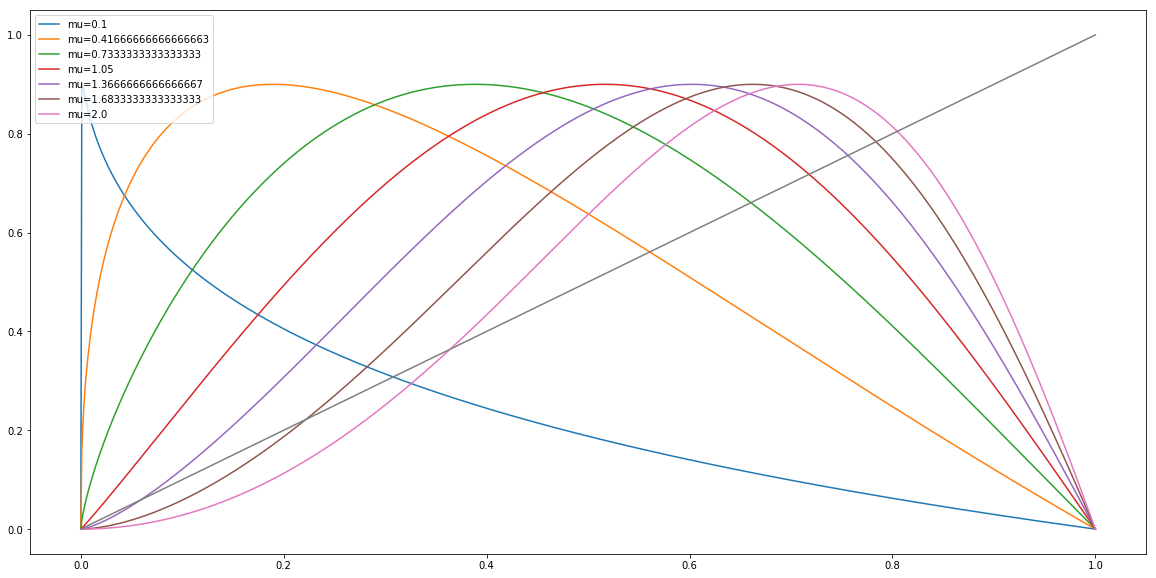

In [0]:
plt.figure(figsize=(20,10))
u_vals=np.linspace(0,1,1000)
for mu in np.linspace(0.1, 2.,7):
    plt.plot(u_vals, generating_function(u_vals, mu), label="mu=%s"%(mu))
    plt.legend()
plt.plot(u_vals, u_vals)

In [0]:
def single_mu_it(n, u, mu):
    iterates = []
    for i in range(n):
        nth_iterate = generating_function(u, mu)
        u=nth_iterate
        iterates.append(nth_iterate)
    return iterates

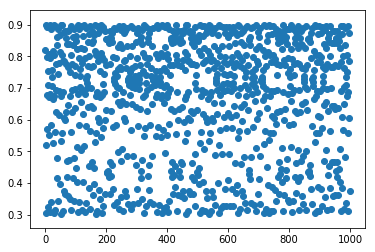

In [0]:
steps=1000
it=single_mu_it(steps, 0.4, 1.1)
it
plt.scatter(range(steps),it)

In [0]:
def stepper(u0, mu0, mu1, N_mu):
    bif_data=[]
    for i in range(N_mu):
        current_mu=mu0+(mu1-mu0)*i/N_mu
        bif_data.append(single_mu_it(spin_up+plot_steps, u0, current_mu)[spin_up:(spin_up+plot_steps)])
    return np.array(bif_data)

In [0]:
spin_up=1000
plot_steps=500
u0=0.6
mu0=0.01
mu1=2.
N_mu=10000
bif_data=stepper(u0, mu0, mu1, N_mu)
mu_range=np.repeat(np.linspace(mu0, mu1, N_mu), plot_steps)


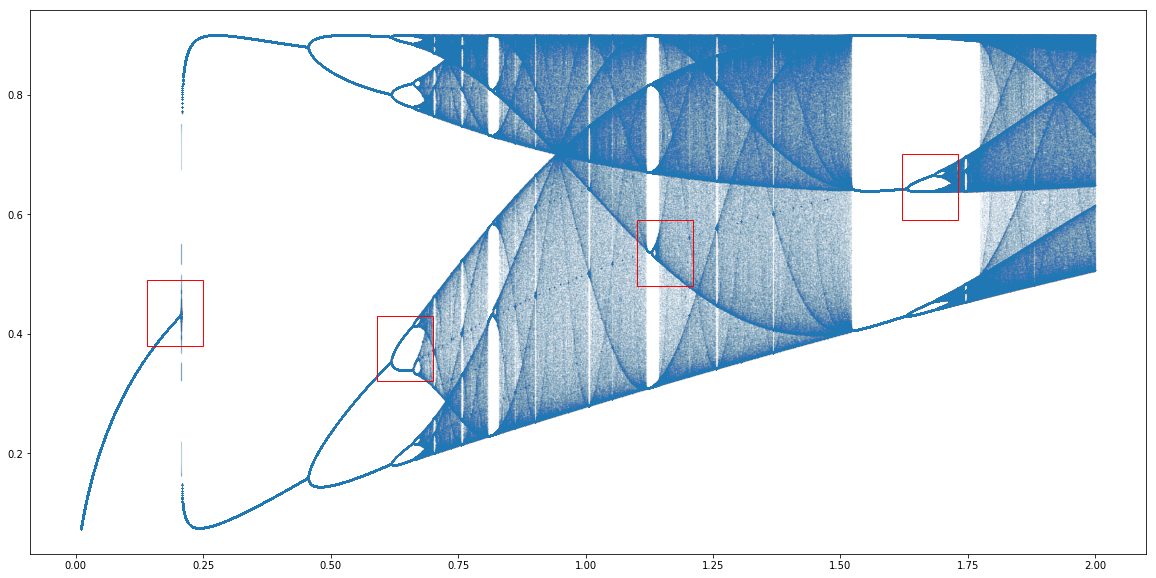

In [0]:
sqs=0.11
window1=[0.14, 0.38]
window2=[0.59, 0.32]
window3=[1.10, 0.48]
window4=[1.62, 0.59]

fig,ax = plt.subplots(1,figsize=(20,10) )
ax.scatter(mu_range, bif_data, marker='.', s=0.001)

rect1 = patches.Rectangle((window1[0],window1[1]),sqs, sqs,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect1)
rect2 = patches.Rectangle((window2[0],window2[1]),sqs, sqs,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect2)
rect3 = patches.Rectangle((window3[0],window3[1]),sqs, sqs,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect3)
rect4 = patches.Rectangle((window4[0],window4[1]),sqs, sqs,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect4)

In this dynamical system, we observe a very similar structure to the one for the logistic map. There is the characteristic period doubling for lower mu and then a transition to a chaotic regime. 

## Some interesting zooms

(0.59, 0.7)

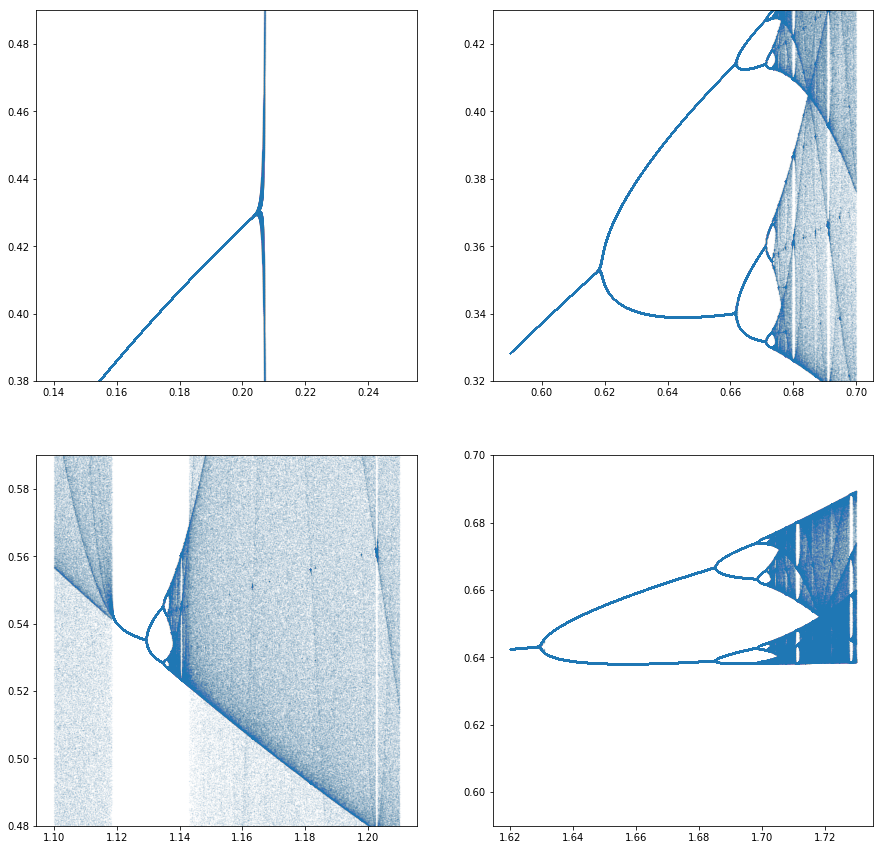

In [0]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
zoom1=stepper(u0, window1[0], window1[0]+sqs, N_mu)
mu_range=np.repeat(np.linspace(window1[0], window1[0]+sqs, N_mu), plot_steps)
plt.scatter(mu_range, zoom1, marker='.', s=0.001)
plt.ylim(window1[1], window1[1]+sqs)

plt.subplot(2,2,2)
zoom1=stepper(u0, window2[0], window2[0]+sqs, N_mu)
mu_range=np.repeat(np.linspace(window2[0], window2[0]+sqs, N_mu), plot_steps)
plt.scatter(mu_range, zoom1, marker='.', s=0.001)
plt.ylim(window2[1], window2[1]+sqs)

plt.subplot(2,2,3)
zoom1=stepper(u0, window3[0], window3[0]+sqs, N_mu)
mu_range=np.repeat(np.linspace(window3[0], window3[0]+sqs, N_mu), plot_steps)
plt.scatter(mu_range, zoom1, marker='.', s=0.001)
plt.ylim(window3[1], window3[1]+sqs)

plt.subplot(2,2,4)
zoom1=stepper(u0, window4[0], window4[0]+sqs, N_mu)
mu_range=np.repeat(np.linspace(window4[0], window4[0]+sqs, N_mu), plot_steps)
plt.scatter(mu_range, zoom1, marker='.', s=0.001)
plt.ylim(window4[1], window4[1]+sqs)

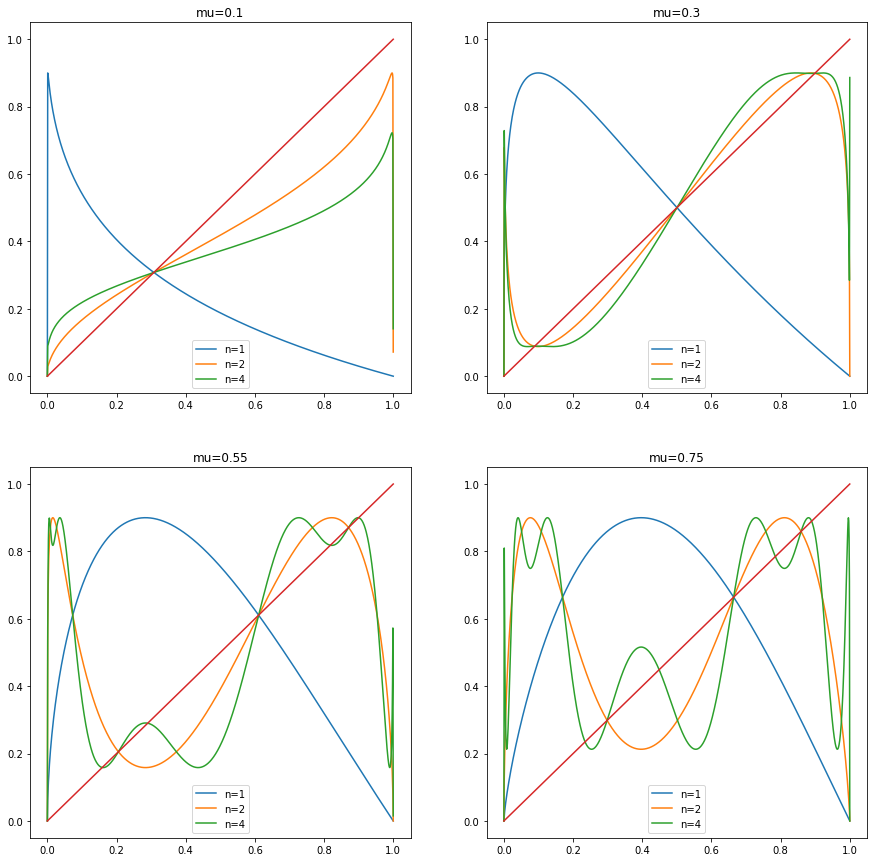

In [0]:
def nth_iterate(n, u, mu):
    for i in range(n):
        u=generating_function(u, mu)
    return u
plt.figure(figsize=(15,15))
i=1
for mu in [0.1, 0.3, 0.55,0.75]:
    plt.subplot(2,2,i )
    for n in [1,2, 4]:
        plt.plot(u_vals, nth_iterate(n,u_vals,mu))
        plt.legend( ["n=1","n=2","n=4"])
    plt.title("mu=%s"%(mu))
    plt.plot(u_vals, u_vals)
    i=i+1

At mu=0.1, we see that the first iterate intersects the diagonal at an obtuse angle, giving a derivative within (0,-1) and thus providing for one stable fixpoint at the intersection.

At mu=0.3 the derivative of the first iterate at the fixpoint has gone lower than -1, but the second iterate now has two intersections with the diagonal, producing two period two fixpoints.

At mu=0.55, the period two fixpoint has also lost stability, giving rise to a period 4 one.

At mu=0.75, none of the iterates have intersections with slopes in the stable interval.

## 2. Spectrum of Logistic Map

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### a)

In [0]:
def logistic_map(mu, u):
    return mu * u * (1 - u)

def logistic_seq(mu, u0=.1, n=10, windup=0):
    u = u0
    for i in range(windup):
        u = logistic_map(mu, u)
    out = []
    for i in range(n):
        u = logistic_map(mu, u)
        out.append(u)
    return(out)

#### i)

Generate $u_i$ for $\mu \in \{ 3.3, 3.5, 3.56, 3.57, 3.826, 3.83, 3.8494\}$. We use a spinup phase, because we want a periodic sequence.

In [0]:
mus = [3.3, 3.5, 3.56, 3.57, 3.826, 3.83, 3.8494]
u0 = .1
windup = 1000
iters = 2**14

In [0]:
sequences = {}
for mu in mus:
    sequences[mu] = logistic_seq(mu, u0, iters, windup)

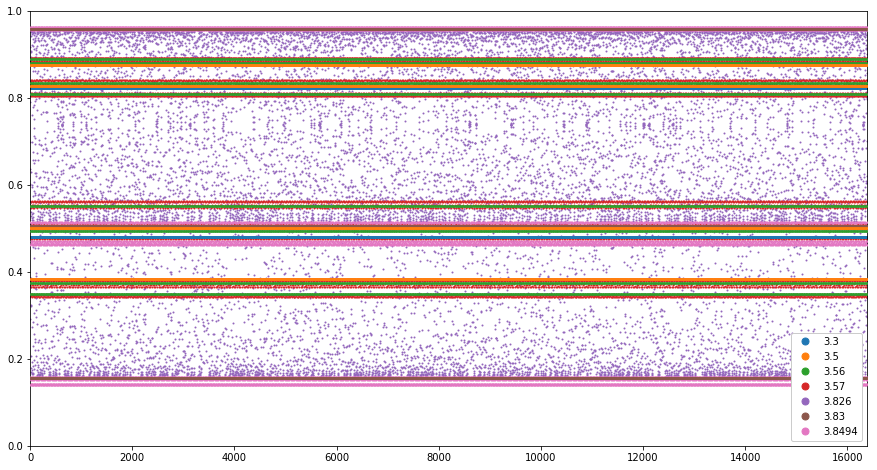

In [97]:
fig = plt.figure()
ax = plt.subplot()

mu_order = [3.826, 3.57, 3.3, 3.8494, 3.83, 3.56, 3.5]

for mu, seq in sequences.items():
    ax.plot(seq, linestyle='none', marker='.', markersize=2, label=mu, zorder=mu_order.index(mu))
ax.legend(markerscale=7, loc=4, framealpha=1)

ax.set_xlim(0, iters)
ax.set_ylim(0, 1)

fig.set_size_inches(15,8)
plt.show()

#### ii)

Calculate the spectra $| \mathcal{F} u |^2$.

In [0]:
spectra = {}
for mu, seq in sequences.items():
    spec = np.fft.rfft(seq)[1:-1]
    spectra[mu] = np.abs(spec)**2
    
freq = np.fft.rfftfreq(iters)[1:-1]

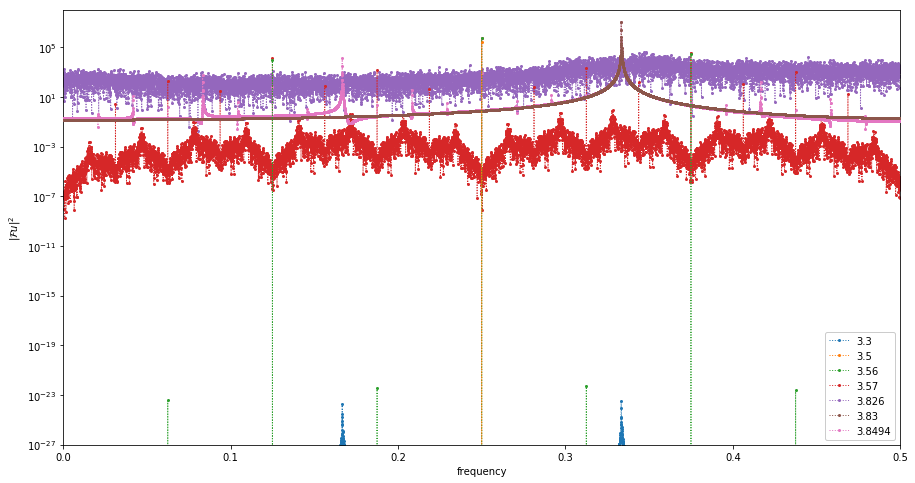

In [99]:
fig = plt.figure()
ax = plt.subplot()

mu_order = [3.826, 3.57, 3.3, 3.8494, 3.83, 3.56, 3.5]

for mu, spec in spectra.items():
    ax.plot(freq, spec, label=mu, linestyle='dotted', marker='.', markersize=4, linewidth=1, zorder=mu_order.index(mu))
ax.legend(loc=4, framealpha=1)
ax.set_xlabel('frequency')
ax.set_ylabel('$| \mathcal{F} u |^2$')
ax.set_ylim(1e-27, 1e8)

ax.set_yscale('log')
ax.set_xlim(0, freq[-1])

fig.set_size_inches(15,8)
plt.show()

Before we reach the chatoic regime, clear peaks are visible (blue, orange, green).

In the chaotic regime, all frequencies are present. Windows in the chaotic regime can be identified by the peaks within these spectra (brown, pink). The purple spectrum is completly chaotic and now sinlge frequency stands out from the others. The red spectrum is on the transition to the chaotic regime. Here some structure remains, but all frequencies are dominant wihin the signal.

#### iii)

Compare for $\mu = 3.83$ the spectra from sequences with $N$ and $3 \times N$ points.

In [0]:
mus = 3.83
u0 = .1
windup = 1000
iters = 3 * 2**14

In [0]:
seq = logistic_seq(mu, u0, iters, windup)
spec = np.abs(np.fft.rfft(seq))[1:-1]**2
new_freq = np.fft.rfftfreq(iters)[1:-1]

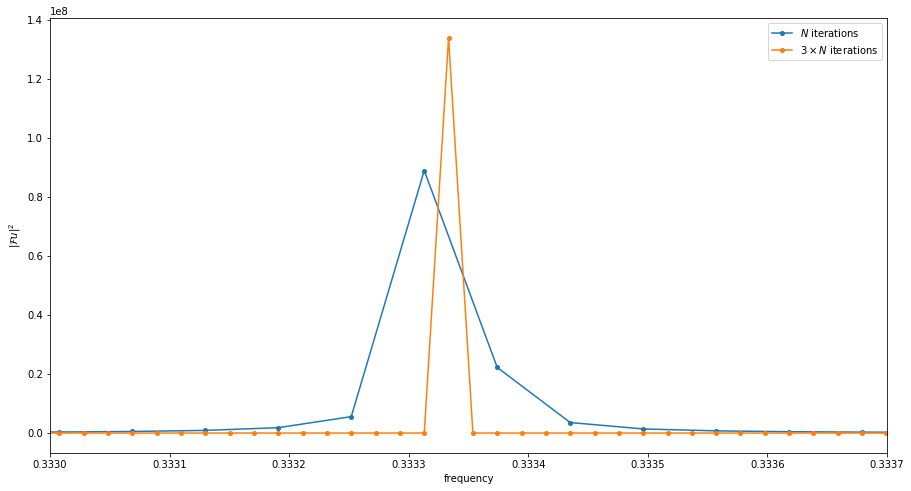

In [102]:
fig = plt.figure()
ax = plt.subplot()

ax.plot(freq, spectra[3.83]*9, marker='.', markersize=8, label=r'$N$ iterations')
ax.plot(new_freq, spec, marker='.', markersize=8, label=r'$3 \times N$ iterations')

ax.legend()
ax.set_xlabel('frequency')
ax.set_ylabel('$| \mathcal{F} u |^2$')

ax.set_xlim(.333, .3337)

fig.set_size_inches(15,8)
plt.show()

With more iterations, the peak in the spectrum is much sharper. This is the case because over time the sequence aproaches the attractor closer. Therefore the non-perodicity get's smaller.

### b)

We look at $\mu = 3$. This at a birfucation point of the logistic map, therfore the sequence approaches the attractor very slowly. The generated squence $u$ is therefor non-periodic for many iterations.

In [0]:
mu = 3.
u0 = .1
windup = 1
iters = 2**17

In [0]:
seq = logistic_seq(mu, u0, iters, windup)
spec = np.abs(np.fft.rfft(seq))[1:-1]**2
freq = np.fft.rfftfreq(iters)[1:-1]

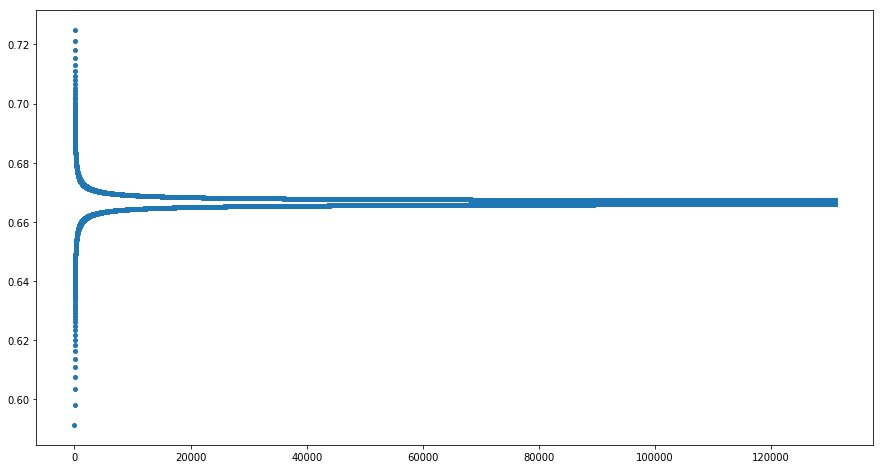

In [105]:
fig = plt.figure()
ax = plt.subplot()

ax.plot(seq, linestyle='none', marker='.', markersize=8)

fig.set_size_inches(15,8)
plt.show()

We see, that the sequence approaches the fixpoint very slowly.

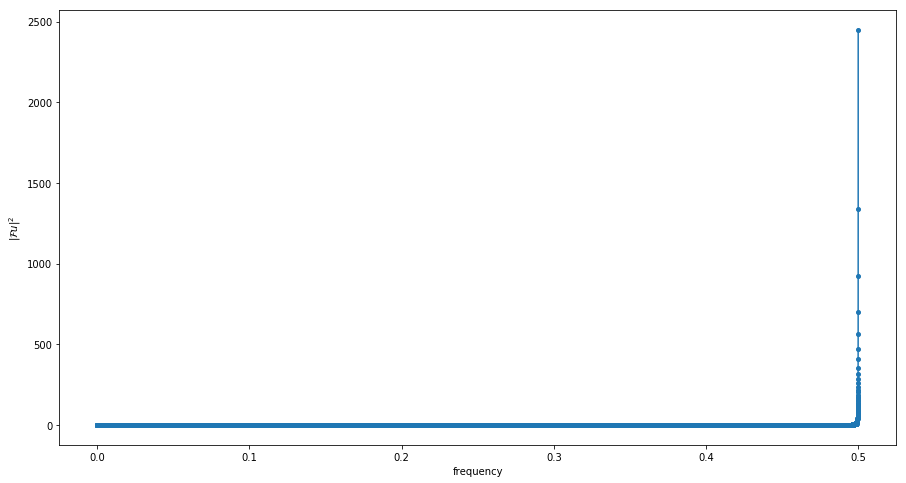

In [106]:
fig = plt.figure()
ax = plt.subplot()

ax.plot(freq, spec, marker='.', markersize=8)
ax.set_xlabel('frequency')
ax.set_ylabel('$| \mathcal{F} u |^2$')

fig.set_size_inches(15,8)
plt.show()

Because the signal is non-peroidic, the Fourier transformation explodes for the lagest frequencies.

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [88]:
def logistic_map(u,mu):
    return mu * u * (1 - u)

    
def n_iterate_map(n, u, mu):
    current_u = u
    for i in range(n):
        current_u = logistic_map(current_u, mu)
    return current_u



def logistic_map2(u,mu):
    return (mu**2)*u*(1-u)*(1-mu*u*(1-u))

def n_iterate_map2(n, u, mu):
    current_u = u
    for i in range(n):
        current_u = logistic_map2(current_u, mu)
    return current_u

def single_mu_it(n, u, mu):
  iterates = []
  for i in range(n+1):
    nth_iterate = n_iterate_map(i, u0, mu)
    iterates.append(nth_iterate)
  return iterates

def single_mu_it2(n, u, mu):
  iterates = []
  for i in range(n+1):
    nth_iterate = n_iterate_map2(i, u0, mu)
    iterates.append(nth_iterate)
  return iterates

def ran(N):
    ran=[]
    for i in range(N):
        ran.append(random.random())
    return ran

In [89]:
i = range(1000)
ran = ran(1000)

mu = 4
u0 = 0.1
n= 1000

a = single_mu_it(n, u0, mu)
b = single_mu_it2(n, u0, mu)

RAN = ran[:-1]

A= [u0]
for i in range(len(a)-1):
    A.append(a[i])


B= [u0]
for i in range(len(a)-1):
    B.append(b[i])


Text(0, 0.5, 'Value')

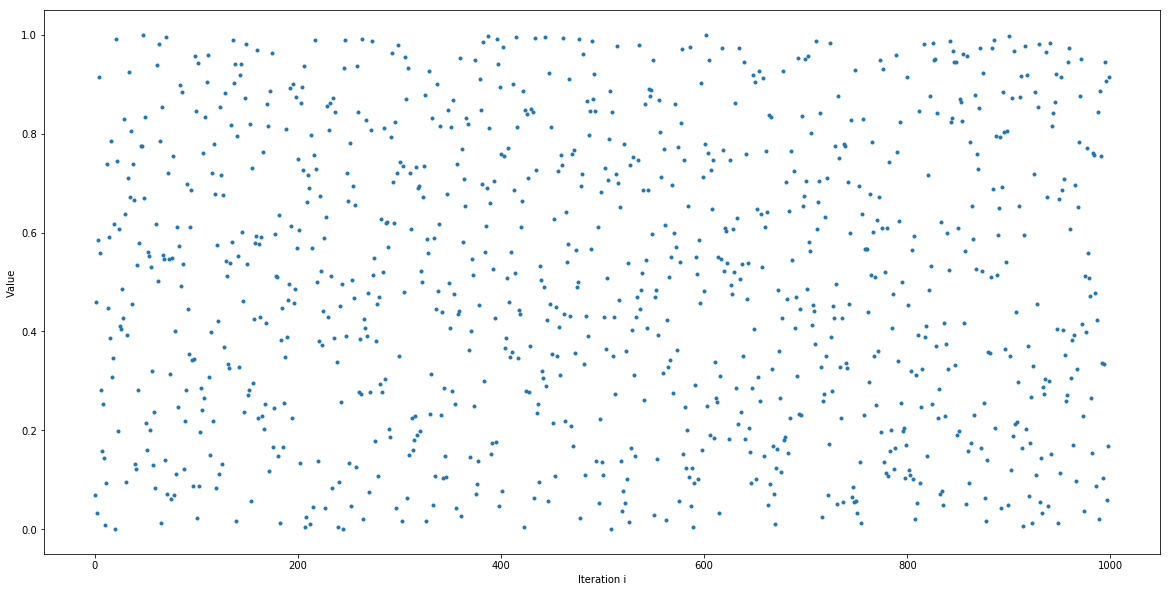

In [90]:
plt.figure(figsize=(20,10))
plt.plot(ran, marker='.', linestyle='None')
plt.xlabel('Iteration i')
plt.ylabel('Value')

Text(0, 0.5, '$u_{i+1}$')

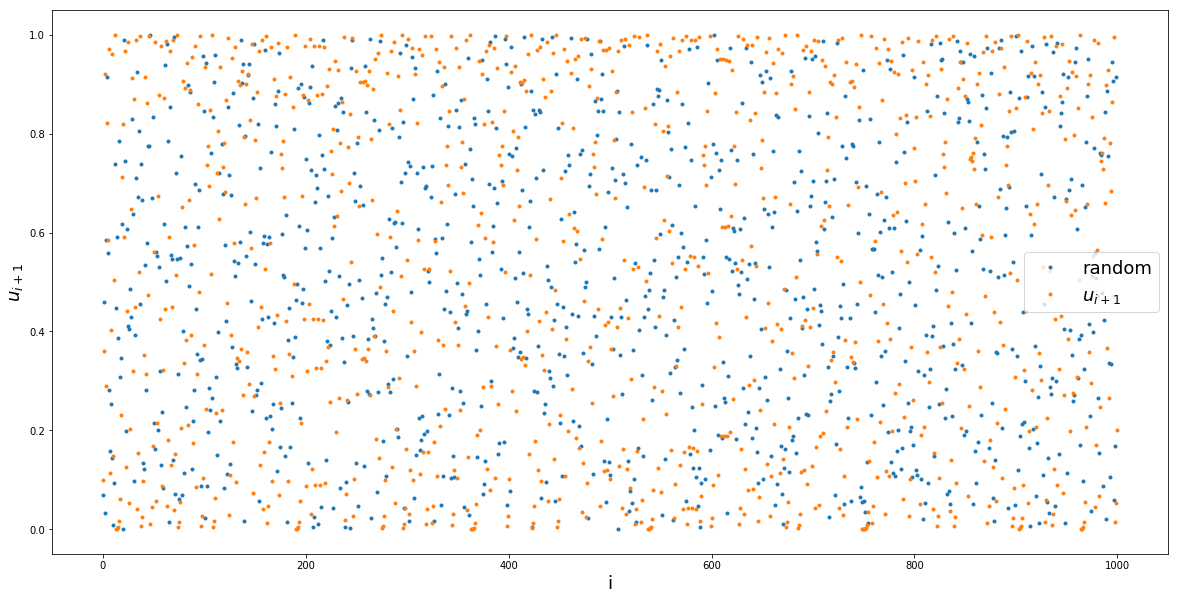

In [96]:
plt.figure(figsize=(20,10))
plt.plot(ran, marker='.', linestyle='None', label='random')
plt.plot(a,marker='.', linestyle='None', label=r'$u_{i+1}$')
plt.legend(prop={'size': 18})
plt.xlabel('i',fontsize=18)
plt.ylabel(r'$u_{i+1}$',fontsize=18)
#plt.ylim(0,1)

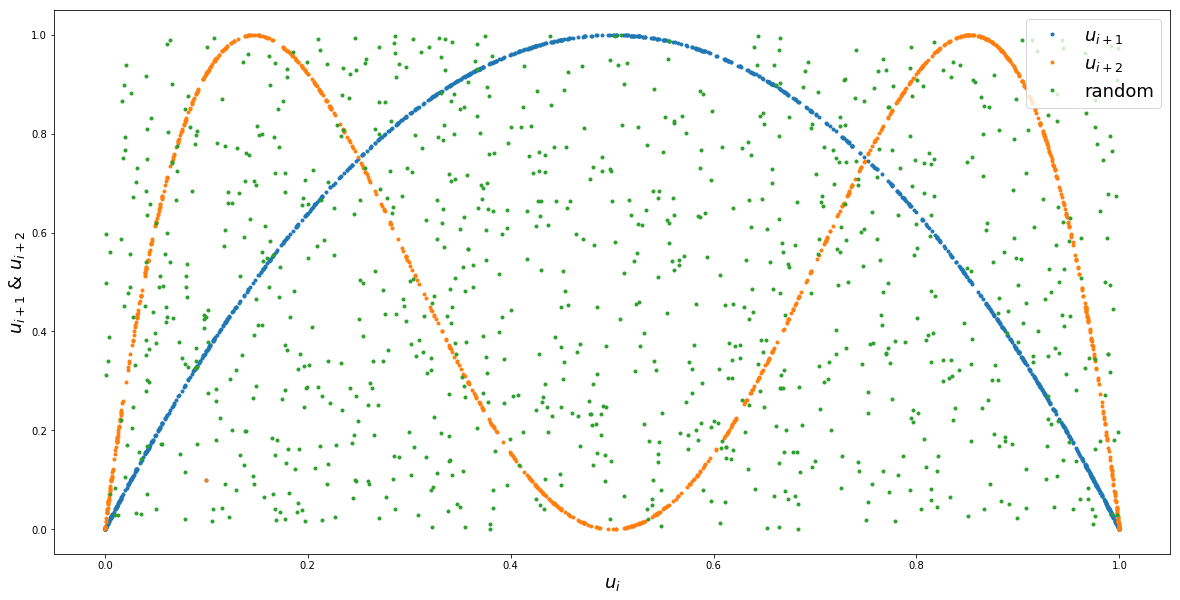

In [86]:
plt.figure(figsize=(20,10))
plt.plot(A,a,marker='.', linestyle='None', label=r'$u_{i+1}$')
plt.plot(B,b,marker='.', linestyle='None', label=r'$u_{i+2}$')
plt.plot(RAN,ran[1:],marker='.', linestyle='None', label='random')
plt.xlabel(r'$u_i$', fontsize=18)
plt.ylabel(r'$u_{i+1}$ & $u_{i+2}$', fontsize=18)
plt.legend(prop={'size': 18})